<a href="https://colab.research.google.com/github/Ray88888888/QI-PS/blob/main/Quantitative_Investing_Problem_Set_4_(Ray%2C_Zhewei%2C_Xinling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Package & Import Data

In [1]:
!pip install --upgrade xlrd
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 1.8 MB/s 


In [3]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 2.1 MB/s 
     |████████████████████████████████| 9.8 MB 25.6 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=6948a160151df57bf57298657cffc7e82d1ecb14360d665a31d4e06b72bf53b6
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=3890b45e93dc8a72fc88ad8dd8603f391db1f5e404c40e70cde0c02a4df64d13
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import datetime
import pingouin as pg

In [5]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.plotting import plot_efficient_frontier
from pypfopt.plotting import plot_weights
from pypfopt import plotting

In [6]:
'''Part I - 30 portfolios of industry value-weighted portfolio returns'''
df30=pd.read_excel('https://github.com/Ray88888888/QI-PS/blob/main/Problem_Set4_2022.xls?raw=true',sheet_name='Industry portfolios (VW)',header=0,index_col=0)
df30.replace([-99.99,-999],[np.nan,np.nan],inplace=True)
df30

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.56,-5.19,1.29,2.93,10.97,-0.48,8.08,1.77,8.14,0.39,...,0.83,9.22,2.06,7.70,1.93,-23.79,0.07,1.87,0.37,5.20
192608,2.59,27.03,6.50,0.55,10.01,-3.58,-2.51,4.25,5.50,8.14,...,2.17,2.02,4.39,-2.38,4.88,5.39,-0.75,-0.13,4.46,6.76
192609,1.16,4.02,1.26,6.58,-0.99,0.73,-0.51,0.69,5.33,2.31,...,2.41,2.25,0.19,-5.54,0.05,-7.87,0.25,-0.56,-1.23,-3.86
192610,-3.06,-3.31,1.06,-4.76,9.47,-4.68,0.12,-0.57,-4.76,1.00,...,-0.11,-2.00,-1.09,-5.08,-2.64,-15.38,-2.20,-4.11,-5.16,-8.49
192611,6.35,7.29,4.55,1.66,-5.80,-0.54,1.87,5.42,5.20,3.11,...,1.63,3.77,3.64,3.84,1.60,4.67,6.52,4.33,2.24,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201607,-0.53,1.84,-2.76,6.08,5.68,2.60,1.64,6.03,4.31,8.41,...,2.36,7.35,8.22,2.54,5.41,3.67,3.80,2.20,3.91,-0.23
201608,-0.51,-0.88,-1.19,1.06,-0.54,1.38,1.39,-3.23,2.51,1.05,...,-3.50,1.14,2.36,2.48,1.11,-1.02,-1.67,-0.22,4.65,2.24
201609,-2.91,1.65,-2.72,4.66,-2.60,0.23,-6.90,0.36,-1.74,-4.85,...,0.48,0.77,4.36,-0.62,2.89,-2.54,-0.16,-2.26,-1.34,-3.52
201610,-0.22,-1.63,4.55,5.53,-10.29,-2.98,-5.74,-7.43,-1.93,-4.15,...,-2.75,-0.48,-2.21,-5.47,-0.62,-8.15,-3.57,-1.90,1.37,-0.50


In [8]:
'''Part II - 10 portfolios formed on short-to-intermediate term past returns'''
df10=pd.read_excel('https://github.com/Ray88888888/QI-PS/blob/main/Problem_Set4_2022.xls?raw=true',sheet_name='Past return portfolios',header=0,index_col=0)
df10.replace([-99.99,-999],[np.nan,np.nan],inplace=True)
df10

,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,
192701,-3.32,-4.62,2.66,-0.32,-0.41,0.96,0.77,0.36,-0.43,-0.24
192702,7.49,6.01,8.33,7.51,3.80,4.16,2.81,3.28,4.21,6.96
192703,-3.20,-2.99,-3.98,-4.76,-0.48,-2.40,2.10,0.61,0.89,5.47
192704,1.53,-2.87,-2.46,-1.34,2.59,-0.13,2.05,-0.59,1.64,5.49
192705,3.98,4.39,5.90,3.15,6.25,5.92,4.66,6.59,8.16,6.24
...,...,...,...,...,...,...,...,...,...,...
201607,7.41,8.63,6.14,6.72,4.34,4.46,2.61,2.29,3.04,4.15
201608,4.87,1.71,2.38,1.45,1.28,1.76,0.00,-0.37,-1.75,-0.96
201609,4.61,2.04,-0.89,-0.35,-0.25,-0.25,0.41,0.39,-0.71,3.04


In [9]:
'''Part III - 25 portfolios formed on size and BE/ME'''
df25=pd.read_excel('https://github.com/Ray88888888/QI-PS/blob/main/Problem_Set4_2022.xls?raw=true',sheet_name='25 size and BEME portfolios',header=0,index_col=0)
df25.replace([-99.99,-999],[np.nan,np.nan],inplace=True)
df25

,1.1,1.2,1.3,1.4,1.5,2.1,2.2,2.3,2.4,2.5,...,4.1,4.2,4.3,4.4,4.5,5.1,5.2,5.3,5.4,5.5
192607,3.78,-0.41,-1.94,0.35,2.05,2.19,2.42,0.49,-1.58,-0.33,...,1.59,1.53,1.19,0.27,2.47,3.45,6.09,2.03,3.11,0.56
192608,-2.21,-8.73,2.44,0.61,8.40,2.17,-1.18,4.01,0.46,6.17,...,1.33,3.87,2.01,2.17,5.34,1.01,4.19,2.01,5.48,7.76
192609,-6.21,-0.30,-6.20,-1.64,0.86,-1.85,-1.26,1.08,-3.04,-0.94,...,1.09,-0.53,-1.73,1.46,0.87,-1.29,3.65,0.10,-0.75,-2.43
192610,-8.62,-3.75,-5.67,5.72,-2.55,-1.80,-3.27,-5.07,-8.05,-1.32,...,-3.34,-2.66,-2.03,-3.11,-5.35,-2.74,-3.01,-2.24,-4.67,-5.81
192611,3.47,6.65,2.26,-4.70,0.54,2.91,-2.37,3.01,4.66,2.73,...,3.44,2.39,3.74,4.93,1.82,4.29,2.53,1.52,3.66,2.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201607,4.78,5.90,6.92,4.84,5.79,8.58,6.38,6.04,4.62,6.73,...,5.07,4.51,3.30,1.95,6.71,4.96,3.41,1.96,1.01,4.53
201608,2.56,3.14,4.14,4.23,3.32,0.08,2.68,2.40,3.22,3.02,...,1.24,0.85,1.78,-0.33,5.01,-0.80,-0.39,0.60,1.37,4.56
201609,11.15,3.42,4.10,2.81,1.70,5.38,2.21,1.19,-0.51,2.15,...,0.09,-0.55,0.79,0.20,-0.16,0.49,0.18,1.21,-2.55,0.36
201610,-10.28,-9.42,-6.37,-3.47,-3.16,-10.02,-7.16,-5.74,-2.54,-5.01,...,-3.50,-1.82,-1.16,-2.00,-0.42,-2.38,-2.00,-1.37,-0.48,2.22


In [16]:
'''Market Data (Rm & Rf)'''
dfm=pd.read_excel('https://github.com/Ray88888888/QI-PS/blob/main/Problem_Set4_2022.xls?raw=true',sheet_name='Market, Rf',header=0,index_col=0)
dfm['RM'] = dfm['RM-RF']+dfm['RF']
dfm

,RM-RF,RF,RM
192607,2.96,0.22,3.18
192608,2.64,0.25,2.89
192609,0.36,0.23,0.59
192610,-3.24,0.32,-2.92
192611,2.53,0.31,2.84
...,...,...,...
201607,3.95,0.02,3.97
201608,0.50,0.02,0.52
201609,0.25,0.02,0.27
201610,-2.02,0.02,-2.00


#Part I: 30 Value-Weight Industry portfolios

In [11]:
'''a'''
'''the sample mean of returns for each of these portfolios'''
df30.mean()

Food     0.977788
Beer     1.208719
Smoke    1.169760
Games    1.123392
Books    0.922710
Hshld    0.923558
Clths    0.924756
Hlth     1.079945
Chems    1.060138
Txtls    1.002562
Cnstr    0.939226
Steel    0.918802
FabPr    1.050765
ElcEq    1.172313
Autos    1.081318
Carry    1.125429
Mines    0.912249
Coal     1.074175
Oil      1.028525
Util     0.878922
Telcm    0.862046
Servs    1.205069
BusEq    1.115512
Paper    1.031853
Trans    0.927889
Whlsl    0.828664
Rtail    1.027088
Meals    1.057659
Fin      1.018654
Other    0.803945
dtype: float64

In [12]:
'''standard deviation of returns for each of these portfolios'''
df30.std()

Food      4.761427
Beer      7.245242
Smoke     5.797902
Games     8.973139
Books     7.196996
Hshld     5.848133
Clths     6.111154
Hlth      5.594199
Chems     6.334617
Txtls     7.674958
Cnstr     6.910755
Steel     8.472893
FabPr     7.250145
ElcEq     7.626893
Autos     8.005115
Carry     7.617315
Mines     7.317549
Coal     10.861973
Oil       6.095102
Util      5.549555
Telcm     4.601945
Servs     8.386944
BusEq     6.794732
Paper     5.892460
Trans     7.108264
Whlsl     7.369051
Rtail     5.990340
Meals     6.524087
Fin       6.827887
Other     6.806062
dtype: float64

In [13]:
'''Sharpe Ratio'''
def Sharpe_Ratio(ret, vol):
  SR = (ret - dfm['RF'].mean())/vol
  return SR

for i in df30.columns:
  print(i, Sharpe_Ratio(df30[i].mean(),df30[i].std()))

Food 0.14695861382914516
Beer 0.1284516949942216
Smoke 0.15379787503184855
Games 0.09420743275227449
Books 0.08957270302790139
Hshld 0.11037749698672976
Clths 0.10582296179582446
Hlth 0.14334301185275422
Chems 0.12346175424468032
Txtls 0.09439880764251012
Cnstr 0.09567268266407924
Steel 0.07562311593044112
FabPr 0.10657850710776613
ElcEq 0.11725064308692484
Autos 0.10034367578366414
Carry 0.11124304571760239
Mines 0.08666748529247148
Coal 0.07329421452509505
Oil 0.12312674738436279
Util 0.10827289764099511
Telcm 0.1269008565475388
Servs 0.11053058422809073
BusEq 0.123250803467914
Paper 0.12792572695309692
Trans 0.0914195263227365
Whlsl 0.07471902157013441
Rtail 0.12504002263343167
Meals 0.11949622141297049
Fin 0.10846681143254892
Other 0.07726779906131243


In [95]:
df30['RM-RF']=dfm['RM-RF']
df30['RF']=dfm['RF']
df30.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other,RM-RF,RF
192607,0.56,-5.19,1.29,2.93,10.97,-0.48,8.08,1.77,8.14,0.39,...,2.06,7.70,1.93,-23.79,0.07,1.87,0.37,5.20,2.96,0.22
192608,2.59,27.03,6.50,0.55,10.01,-3.58,-2.51,4.25,5.50,8.14,...,4.39,-2.38,4.88,5.39,-0.75,-0.13,4.46,6.76,2.64,0.25
192609,1.16,4.02,1.26,6.58,-0.99,0.73,-0.51,0.69,5.33,2.31,...,0.19,-5.54,0.05,-7.87,0.25,-0.56,-1.23,-3.86,0.36,0.23
192610,-3.06,-3.31,1.06,-4.76,9.47,-4.68,0.12,-0.57,-4.76,1.00,...,-1.09,-5.08,-2.64,-15.38,-2.20,-4.11,-5.16,-8.49,-3.24,0.32
192611,6.35,7.29,4.55,1.66,-5.80,-0.54,1.87,5.42,5.20,3.11,...,3.64,3.84,1.60,4.67,6.52,4.33,2.24,4.00,2.53,0.31


In [104]:
alpha_hat = [0]
for i in df30.iloc[:,:-2].columns:
  lm = pg.linear_regression(df30[i]-df30['RF'], df30['RM-RF'])
  alpha_hat.append(lm.coef[0])
  #print(i)
  #print('\n')
  #print(lm)
  #print('\n')

alpha_hat = np.array(alpha_hat[1:])
alpha_hat = alpha_hat.reshape((30,1))

alpha_hat

array([[-0.00764988],
       [ 0.1701929 ],
       [ 0.16870079],
       [ 0.23155147],
       [ 0.25360088],
       [ 0.16174652],
       [ 0.24589098],
       [ 0.03157198],
       [ 0.06734258],
       [ 0.24849485],
       [ 0.18469691],
       [ 0.30285761],
       [ 0.12709616],
       [ 0.08264526],
       [ 0.20040766],
       [ 0.15196292],
       [ 0.3421065 ],
       [ 0.3983531 ],
       [ 0.14650897],
       [ 0.21296542],
       [ 0.12494545],
       [ 0.34271164],
       [ 0.09001814],
       [ 0.0558053 ],
       [ 0.23025425],
       [ 0.33337826],
       [ 0.07166525],
       [ 0.15317364],
       [ 0.11755404],
       [ 0.3038049 ]])

In [105]:
for t in df30.index:
  ebs_t = [0]
  for i in df30.iloc[:,:-2].columns:
    lm = pg.linear_regression(df30[i]-df30['RF'], df30['RM-RF'])
    ebs = (df30[i][t]-df30['RF'][t]) - lm.coef[0] - lm.coef[1]*dfm['RM-RF'].mean()
    ebs_t.append(ebs)
  ebs_t = ebs_t[1:]
  ebs_t = np.array(ebs_t)
  ebs_t = ebs_t.reshape((30,1))
  ebs_t = (ebs_t).dot(ebs_t.T)
  if t == df30.index[0]:
    sigma_hat = ebs_t
  else:
    sigma_hat += ebs_t

sigma_hat = sigma_hat/len(df30.index)
sigma_hat

array([[ 22.64315844,  24.19755602,  18.41188815,  30.36851213,
         25.00851718,  22.2771223 ,  18.85241916,  20.7581049 ,
         22.32587131,  25.03577393,  25.50463912,  25.83316436,
         25.15775608,  27.24488104,  25.39190739,  25.66351526,
         17.83052286,  25.99194375,  17.52345118,  18.66669021,
         14.22581862,  16.6677281 ,  20.60068746,  21.38422193,
         24.00440085,  24.24065891,  22.97618974,  22.7869023 ,
         26.15969305,  23.43118326],
       [ 24.19755602,  52.71489707,  19.25208642,  42.37259915,
         31.20824183,  27.92342454,  22.81044238,  26.09598686,
         28.41662777,  34.31656167,  34.46843749,  33.44790998,
         33.17483004,  34.35174713,  32.71967913,  34.2995876 ,
         24.15262112,  34.37968077,  22.36967458,  23.10712003,
         16.87449956,  21.10704064,  26.57365946,  26.51830133,
         31.47412249,  35.46979352,  28.41689415,  30.12287947,
         33.34148071,  30.88745946],
       [ 18.41188815,  19.2520

In [108]:
from scipy.stats import f

def GRS(alpha_hat, sigma_hat, T, N, K):
  
  # dividing the GRS equation into 3 sections a, b and c to simplyfy
  # Part a
  T = T #number of time-series observations
  N = N # number of portfolios
  K = K # number of factors
  a = (T - N - K)/N
  # Part b
  b = (1+(dfm['RM-RF'].mean()/dfm['RM-RF'].std())**2)**(-1)
  # Part c
  sigma_hat_inv = np.linalg.inv(sigma_hat)
  c = (alpha_hat.T).dot(sigma_hat_inv).dot(alpha_hat)

  # Putting the 3 GRS parts together
  J1 = a*b*c
  print(J1)
    
  dfn = N
  dfd = T - N - K
    
  p_value = 1- f.cdf (J1, dfn, dfd)
  print('p-value', p_value)

In [109]:
'''b'''
GRS(alpha_hat, sigma_hat, len(df30.index), 30, 1)

[[0.61279272]]
p-value [[0.95048297]]


In [ ]:
'''d'''
Intercepts30 = pd.DataFrame(index=df30.columns[:-2], columns=['estimate', 'p-value'], dtype=float)
for i in df30.columns[:-2]:
  lm = pg.linear_regression(df30[i]-df30['RF'], df30['RM-RF'])
  Intercepts30['estimate'][i] = lm.coef[0]
  Intercepts30['p-value'][i] = lm.pval[0]
Intercepts30

,estimate,p-value
Food,-0.007650,0.932934
Beer,0.170193,0.148871
Smoke,0.168701,0.208613
Games,0.231551,0.011355
Books,0.253601,0.006020
Hshld,0.161747,0.079747
Clths,0.245891,0.032530
Hlth,0.031572,0.746646
Chems,0.067343,0.384285
Txtls,0.248495,0.012434


#Part II: 10 Past Return Portfolios

In [ ]:
'''a'''
'''the sample mean of returns for each of these portfolios'''
df10.mean()

1     0.318397
2     0.699073
3     0.752150
4     0.877442
5     0.882475
6     0.935774
7     1.014282
8     1.117192
9     1.198285
10    1.503781
dtype: float64

In [ ]:
'''standard deviation of returns for each of these portfolios'''
df10.std()

1     9.789894
2     8.053533
3     6.988253
4     6.355927
5     5.951824
6     5.802873
7     5.495077
8     5.343268
9     5.627951
10    6.485745
dtype: float64

In [ ]:
'''Sharpe Ratio'''
def Sharpe_Ratio(ret, vol):
  SR = (ret - dfm['RF'].mean())/vol
  return SR

for i in df10.columns:
  print(i, Sharpe_Ratio(df10[i].mean(),df10[i].std()))

1 0.004120715302294064
2 0.05227741785495709
3 0.06784167955218137
4 0.09430359747381363
5 0.10155192692803493
6 0.11334361290628135
7 0.13397927146750424
8 0.15704556892481164
9 0.1635106894307496
10 0.18898770530445483


In [102]:
df10['RM-RF']=dfm['RM-RF']
df10['RF']=dfm['RF']
df10.head()

,1,2,3,4,5,6,7,8,9,10,RM-RF,RF
Date,,,,,,,,,,,,
192701,-3.32,-4.62,2.66,-0.32,-0.41,0.96,0.77,0.36,-0.43,-0.24,-0.06,0.25
192702,7.49,6.01,8.33,7.51,3.80,4.16,2.81,3.28,4.21,6.96,4.18,0.26
192703,-3.20,-2.99,-3.98,-4.76,-0.48,-2.40,2.10,0.61,0.89,5.47,0.13,0.30
192704,1.53,-2.87,-2.46,-1.34,2.59,-0.13,2.05,-0.59,1.64,5.49,0.46,0.25
192705,3.98,4.39,5.90,3.15,6.25,5.92,4.66,6.59,8.16,6.24,5.44,0.30


In [111]:
alpha_hat = [0]
for i in df10.iloc[:,:-2].columns:
  lm = pg.linear_regression(df10[i]-df10['RF'], df10['RM-RF'])
  alpha_hat.append(lm.coef[0])
  #print(i)
  #print('\n')
  #print(lm)
  #print('\n')

alpha_hat = np.array(alpha_hat[1:])
alpha_hat = alpha_hat.reshape((10,1))

alpha_hat

array([[ 0.62872373],
       [ 0.39847358],
       [ 0.31756864],
       [ 0.17892243],
       [ 0.13638446],
       [ 0.06641994],
       [-0.03421957],
       [-0.14552337],
       [-0.16247285],
       [-0.21496891]])

In [112]:
for t in df10.index:
  ebs_t = [0]
  for i in df10.iloc[:,:-2].columns:
    lm = pg.linear_regression(df10[i]-df10['RF'], df10['RM-RF'])
    ebs = (df10[i][t]-df10['RF'][t]) - lm.coef[0] - lm.coef[1]*dfm['RM-RF'].mean()
    ebs_t.append(ebs)
  ebs_t = ebs_t[1:]
  ebs_t = np.array(ebs_t)
  ebs_t = ebs_t.reshape((10,1))
  ebs_t = (ebs_t).dot(ebs_t.T)
  if t == df10.index[0]:
    sigma_hat = ebs_t
  else:
    sigma_hat += ebs_t

sigma_hat = sigma_hat/len(df10.index)
sigma_hat

array([[96.89302862, 74.01957603, 62.26994478, 55.08005632, 50.63317156,
        47.27055562, 41.66898619, 37.89315168, 37.55494023, 37.58442781],
       [74.01957603, 65.1249495 , 53.19145098, 47.4029914 , 43.62093373,
        41.22649491, 36.30540658, 33.03144208, 32.36397996, 31.65434061],
       [62.26994478, 53.19145098, 48.98558749, 42.02755862, 38.87612244,
        36.80529956, 32.66022441, 29.94405277, 29.37284328, 28.29668986],
       [55.08005632, 47.4029914 , 42.02755862, 40.5002716 , 35.66196686,
        34.17870798, 30.89822002, 28.6403165 , 28.28044391, 27.48979738],
       [50.63317156, 43.62093373, 38.87612244, 35.66196686, 35.55115427,
        32.48679828, 29.64612787, 27.57212943, 27.4836262 , 27.12042828],
       [47.27055562, 41.22649491, 36.80529956, 34.17870798, 32.48679828,
        33.78215813, 29.93341858, 28.1347168 , 28.59361279, 28.59176969],
       [41.66898619, 36.30540658, 32.66022441, 30.89822002, 29.64612787,
        29.93341858, 30.34690603, 27.39577098

In [114]:
'''b'''
GRS(alpha_hat, sigma_hat, len(df10.index), 10, 1)

[[1.69651332]]
p-value [[0.07672679]]


In [ ]:
'''d'''
Intercepts10 = pd.DataFrame(index=df10.columns[:-2], columns=['estimate', 'p-value'], dtype=float)
for i in df10.columns[:-2]:
  lm = pg.linear_regression(df10[i]-df10['RF'], df10['RM-RF'])
  Intercepts10['estimate'][i] = lm.coef[0]
  Intercepts10['p-value'][i] = lm.pval[0]
Intercepts10

,estimate,p-value
1,0.628724,2.622950e-13
2,0.398474,1.839818e-07
3,0.317569,6.350709e-06
4,0.178922,4.389349e-03
5,0.136384,1.785802e-02
6,0.066420,1.773550e-01
7,-0.034220,5.170389e-01
8,-0.145523,1.050958e-02
9,-0.162473,1.197995e-02
10,-0.214969,1.497849e-02


#Part III: 25 Size and BE/ME Portfolios

###f

In [ ]:
'''a'''
'''the sample mean of returns for each of these portfolios'''
df25.mean()

1.1    0.841742
1.2    0.969871
1.3    1.272442
1.4    1.461419
1.5    1.642433
2.1    0.899124
2.2    1.204101
2.3    1.269005
2.4    1.357530
2.5    1.534479
3.1    0.976737
3.2    1.184452
3.3    1.211539
3.4    1.296968
3.5    1.436212
4.1    0.989060
4.2    1.026240
4.3    1.140424
4.4    1.248276
4.5    1.311751
5.1    0.889207
5.2    0.904488
5.3    0.980046
5.4    0.929263
5.5    1.238323
dtype: float64

In [ ]:
'''standard deviation of returns for each of these portfolios'''
df25.std()

1.1    12.254214
1.2     9.866963
1.3     9.012891
1.4     8.354486
1.5     9.305422
2.1     7.995763
2.2     7.506243
2.3     7.267494
2.4     7.434960
2.5     8.714135
3.1     7.414335
3.2     6.474629
3.3     6.518344
3.4     6.902208
3.5     8.525030
4.1     6.262388
4.2     6.080223
4.3     6.423019
4.4     6.811086
4.5     8.732313
5.1     5.346013
5.2     5.309354
5.3     5.645527
5.4     6.622408
5.5     8.569351
dtype: float64

In [ ]:
'''Sharpe Ratio'''
def Sharpe_Ratio(ret, vol):
  SR = (ret - dfm['RF'].mean())/vol
  return SR

for i in df25.columns:
  print(i, Sharpe_Ratio(df25[i].mean(),df25[i].std()))

1.1 0.04599941298412072
1.2 0.07011434473537113
1.3 0.1103294323833082
1.4 0.14164415610036246
1.5 0.14662181358710882
2.1 0.0776747776366415
2.2 0.12337011391592062
2.3 0.13635364152593266
2.4 0.14518902468212555
2.5 0.14418229432736396
3.1 0.09423393792214031
3.2 0.13999200258761016
3.3 0.143208745936404
3.4 0.14762122607969136
3.5 0.1358536763060327
4.1 0.11353569823229827
4.2 0.12305211451286226
4.3 0.1342622000245823
4.4 0.14244735091675756
4.5 0.11837595423791923
5.1 0.11431923567459777
5.2 0.11798669916354068
5.3 0.12434460795456911
5.4 0.09833392864255737
5.5 0.11205834207241287


In [117]:
df25['RM-RF']=dfm['RM-RF']
df25['RF']=dfm['RF']
df25.head()

,1.1,1.2,1.3,1.4,1.5,2.1,2.2,2.3,2.4,2.5,...,4.3,4.4,4.5,5.1,5.2,5.3,5.4,5.5,RM-RF,RF
192607,3.78,-0.41,-1.94,0.35,2.05,2.19,2.42,0.49,-1.58,-0.33,...,1.19,0.27,2.47,3.45,6.09,2.03,3.11,0.56,2.96,0.22
192608,-2.21,-8.73,2.44,0.61,8.40,2.17,-1.18,4.01,0.46,6.17,...,2.01,2.17,5.34,1.01,4.19,2.01,5.48,7.76,2.64,0.25
192609,-6.21,-0.30,-6.20,-1.64,0.86,-1.85,-1.26,1.08,-3.04,-0.94,...,-1.73,1.46,0.87,-1.29,3.65,0.10,-0.75,-2.43,0.36,0.23
192610,-8.62,-3.75,-5.67,5.72,-2.55,-1.80,-3.27,-5.07,-8.05,-1.32,...,-2.03,-3.11,-5.35,-2.74,-3.01,-2.24,-4.67,-5.81,-3.24,0.32
192611,3.47,6.65,2.26,-4.70,0.54,2.91,-2.37,3.01,4.66,2.73,...,3.74,4.93,1.82,4.29,2.53,1.52,3.66,2.56,2.53,0.31


In [115]:
alpha_hat = [0]
for i in df25.iloc[:,:-2].columns:
  lm = pg.linear_regression(df25[i]-df25['RF'], df25['RM-RF'])
  alpha_hat.append(lm.coef[0])
  #print(i)
  #print('\n')
  #print(lm)
  #print('\n')

alpha_hat = np.array(alpha_hat[1:])
alpha_hat = alpha_hat.reshape((25,1))

alpha_hat

array([[ 0.47509518],
       [ 0.36278687],
       [ 0.16778306],
       [ 0.03207678],
       [ 0.02587292],
       [ 0.2978809 ],
       [ 0.07169356],
       [ 0.00485671],
       [-0.03021021],
       [-0.00528242],
       [ 0.19655368],
       [-0.04845724],
       [-0.05849606],
       [-0.06208191],
       [ 0.01882272],
       [ 0.08227425],
       [ 0.0237255 ],
       [-0.01919792],
       [-0.04311978],
       [ 0.096629  ],
       [ 0.06409281],
       [ 0.04385453],
       [ 0.0378573 ],
       [ 0.17698829],
       [ 0.15726815]])

In [120]:
for t in df25.index:
  ebs_t = [0]
  for i in df25.iloc[:,:-2].columns:
    lm = pg.linear_regression(df25[i]-df25['RF'], df25['RM-RF'])
    ebs = (df25[i][t]-df25['RF'][t]) - lm.coef[0] - lm.coef[1]*dfm['RM-RF'].mean()
    ebs_t.append(ebs)
  ebs_t = ebs_t[1:]
  ebs_t = np.array(ebs_t)
  ebs_t = ebs_t.reshape((25,1))
  ebs_t = (ebs_t).dot(ebs_t.T)
  if t == df25.index[0]:
    sigma_hat = ebs_t
  else:
    sigma_hat += ebs_t

sigma_hat = sigma_hat/len(df25.index)
sigma_hat

array([[150.35209488,  86.33149888,  86.59448217,  79.17121204,
         90.01482555,  75.95499824,  68.556189  ,  68.12026024,
         70.12906252,  84.35539502,  69.85032172,  58.88639857,
         58.45314145,  62.24419003,  79.71382986,  54.16309059,
         51.86883688,  54.50467459,  61.57439057,  75.51467967,
         42.04676424,  41.70382284,  44.43102121,  53.32722261,
         71.95699362],
       [ 86.33149888,  97.39832112,  76.22548842,  74.3701609 ,
         79.83257214,  68.09071823,  65.31888877,  62.3566692 ,
         62.97929232,  71.59080584,  62.49160123,  52.09581033,
         52.13932181,  56.10866194,  66.0328959 ,  46.82819157,
         46.92371497,  49.43695497,  50.81439367,  65.15619925,
         36.16381071,  35.66001005,  37.55840243,  45.37060748,
         53.70026286],
       [ 86.59448217,  76.22548842,  81.65743449,  70.28336049,
         77.92943741,  61.13341093,  61.18696995,  59.96609694,
         61.6925794 ,  71.13229744,  58.238271  ,  50.5723

In [121]:
'''b'''
GRS(alpha_hat, sigma_hat, len(df25.index), 25, 1)

[[1.24182024]]
p-value [[0.19134941]]


In [ ]:
'''d'''
Intercepts25 = pd.DataFrame(index=df25.columns[:-2], columns=['estimate', 'p-value'], dtype=float)
for i in df25.columns[:-2]:
  lm = pg.linear_regression(df25[i]-df25['RF'], df25['RM-RF'])
  Intercepts25['estimate'][i] = lm.coef[0]
  Intercepts25['p-value'][i] = lm.pval[0]
Intercepts25

,estimate,p-value
1.1,0.475095,0.000035
1.2,0.362787,0.000573
1.3,0.167783,0.076520
1.4,0.032077,0.736969
1.5,0.025873,0.795814
2.1,0.297881,0.000599
2.2,0.071694,0.365844
2.3,0.004857,0.949716
2.4,-0.030210,0.705191
2.5,-0.005282,0.951679


###g (in-sample tangency portfolio)

In [122]:
df25_1 = df25.iloc[: , :-2]
ef = EfficientFrontier(df25_1.mean(),df25_1.cov(), weight_bounds=(-100, 100))  # setup
ef.max_sharpe(risk_free_rate = df25['RF'].mean())

OrderedDict([(1.1, -0.4515059968852533),
             (1.2, -0.753862273019531),
             (1.3, -0.4674821436237422),
             (1.4, 0.8088890537539603),
             (1.5, 0.8878744420084758),
             (2.1, -0.9152534750983918),
             (2.2, 0.0854895795347107),
             (2.3, 0.3257618247098526),
             (2.4, 0.7177724662262767),
             (2.5, 0.3098886148806556),
             (3.1, -0.5413538471445515),
             (3.2, 0.9849507359055552),
             (3.3, 0.3550277588810874),
             (3.4, 0.3660459667337622),
             (3.5, 0.1305198572376066),
             (4.1, 0.9612955154666368),
             (4.2, -1.3216637099513593),
             (4.3, -0.1117912510433666),
             (4.4, 0.4776545169202966),
             (4.5, -0.7222465121551448),
             (5.1, 0.7065114078857663),
             (5.2, -0.1523212911856455),
             (5.3, 0.7153603191239991),
             (5.4, -1.4967645248948083),
             (5.5, 0.1012029657

In [123]:
data = [(1.1, -0.4515059968852533),
             (1.2, -0.753862273019531),
             (1.3, -0.4674821436237422),
             (1.4, 0.8088890537539603),
             (1.5, 0.8878744420084758),
             (2.1, -0.9152534750983918),
             (2.2, 0.0854895795347107),
             (2.3, 0.3257618247098526),
             (2.4, 0.7177724662262767),
             (2.5, 0.3098886148806556),
             (3.1, -0.5413538471445515),
             (3.2, 0.9849507359055552),
             (3.3, 0.3550277588810874),
             (3.4, 0.3660459667337622),
             (3.5, 0.1305198572376066),
             (4.1, 0.9612955154666368),
             (4.2, -1.3216637099513593),
             (4.3, -0.1117912510433666),
             (4.4, 0.4776545169202966),
             (4.5, -0.7222465121551448),
             (5.1, 0.7065114078857663),
             (5.2, -0.1523212911856455),
             (5.3, 0.7153603191239991),
             (5.4, -1.4967645248948083),
             (5.5, 0.1012029657331516)]
df_tangency_weights = pd.DataFrame(data)
df_tangency_weights = df_tangency_weights.transpose()
index = [0]
for i in range(25):
  index.append(df_tangency_weights[i][0])
index = index [1:]
df_tangency_weights.columns = index
df_tangency_weights.drop(0,axis=0,inplace=True)
df_tangency_weights.index = ['weights']
df_tangency_weights.transpose()

,weights
1.1,-0.451506
1.2,-0.753862
1.3,-0.467482
1.4,0.808889
1.5,0.887874
2.1,-0.915253
2.2,0.085490
2.3,0.325762
2.4,0.717772
2.5,0.309889


In [124]:
timeseries = df25.index
order = [0]
for i in range(1, df25.shape[0]):
  order.append(i)
df25.index = order

Tan_Ret = [0]
for i in range(0, df25.shape[0]):
  tan_ret = 0
  for j in df_tangency_weights.columns:
    tan_ret = tan_ret + df25[j][i] * df_tangency_weights[j]['weights']
  Tan_Ret.append(tan_ret)
Tan_Ret = Tan_Ret[1:]

df25['Tan_Ret']=Tan_Ret
df25['Tan-RF'] = df25['Tan_Ret'] - df25['RF'] 
df25.index = timeseries
df25

,1.1,1.2,1.3,1.4,1.5,2.1,2.2,2.3,2.4,2.5,...,4.5,5.1,5.2,5.3,5.4,5.5,RM-RF,RF,Tan_Ret,Tan-RF
192607,3.78,-0.41,-1.94,0.35,2.05,2.19,2.42,0.49,-1.58,-0.33,...,2.47,3.45,6.09,2.03,3.11,0.56,2.96,0.22,-2.714576,-2.934576
192608,-2.21,-8.73,2.44,0.61,8.40,2.17,-1.18,4.01,0.46,6.17,...,5.34,1.01,4.19,2.01,5.48,7.76,2.64,0.25,9.317496,9.067496
192609,-6.21,-0.30,-6.20,-1.64,0.86,-1.85,-1.26,1.08,-3.04,-0.94,...,0.87,-1.29,3.65,0.10,-0.75,-2.43,0.36,0.23,6.451915,6.221915
192610,-8.62,-3.75,-5.67,5.72,-2.55,-1.80,-3.27,-5.07,-8.05,-1.32,...,-5.35,-2.74,-3.01,-2.24,-4.67,-5.81,-3.24,0.32,10.705526,10.385526
192611,3.47,6.65,2.26,-4.70,0.54,2.91,-2.37,3.01,4.66,2.73,...,1.82,4.29,2.53,1.52,3.66,2.56,2.53,0.31,-3.528739,-3.838739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201607,4.78,5.90,6.92,4.84,5.79,8.58,6.38,6.04,4.62,6.73,...,6.71,4.96,3.41,1.96,1.01,4.53,3.95,0.02,2.476664,2.456664
201608,2.56,3.14,4.14,4.23,3.32,0.08,2.68,2.40,3.22,3.02,...,5.01,-0.80,-0.39,0.60,1.37,4.56,0.50,0.02,4.527422,4.507422
201609,11.15,3.42,4.10,2.81,1.70,5.38,2.21,1.19,-0.51,2.15,...,-0.16,0.49,0.18,1.21,-2.55,0.36,0.25,0.02,-3.065354,-3.085354
201610,-10.28,-9.42,-6.37,-3.47,-3.16,-10.02,-7.16,-5.74,-2.54,-5.01,...,-0.42,-2.38,-2.00,-1.37,-0.48,2.22,-2.02,0.02,5.062079,5.042079


In [131]:
alpha_hat = [0]
for i in df25.iloc[:,:-4].columns:
  lm = pg.linear_regression(df25[i]-df25['RF'], df25['Tan-RF'])
  alpha_hat.append(lm.coef[0])
  #print(i)
  #print('\n')
  #print(lm)
  #print('\n')

alpha_hat = np.array(alpha_hat[1:])
alpha_hat = alpha_hat.reshape((25,1))

alpha_hat

array([[2.51573257],
       [2.44274193],
       [2.25311837],
       [2.04759015],
       [2.01012729],
       [2.41312812],
       [2.17373876],
       [2.08593349],
       [2.0211435 ],
       [2.02870735],
       [2.33889077],
       [2.05977617],
       [2.03607138],
       [2.00262082],
       [2.08953997],
       [2.23445487],
       [2.17583143],
       [2.1006812 ],
       [2.04168965],
       [2.20536448],
       [2.22978053],
       [2.2075248 ],
       [2.16744599],
       [2.3185606 ],
       [2.24326778]])

In [132]:
E_market_premium = df25['Tan-RF'].mean()
for t in df25.index:
  ebs_t = [0]
  for i in df25.iloc[:,:-4].columns:
    lm = pg.linear_regression(df25[i]-df25['RF'], df25['Tan-RF'])
    ebs = (df25[i][t]-df25['RF'][t]) - lm.coef[0] - lm.coef[1]*E_market_premium
    ebs_t.append(ebs)
  ebs_t = ebs_t[1:]
  ebs_t = np.array(ebs_t)
  ebs_t = ebs_t.reshape((25,1))
  ebs_t = (ebs_t).dot(ebs_t.T)
  if t == df25.index[0]:
    sigma_hat = ebs_t
  else:
    sigma_hat += ebs_t

sigma_hat = sigma_hat/len(df25.index)
sigma_hat

array([[155.2090737 ,  91.25907978,  91.24851602,  83.6846134 ,
         93.89490567,  81.35229026,  73.79918887,  73.38259441,
         75.18137381,  88.61781069,  75.36911307,  64.68827403,
         64.19919379,  67.65599302,  84.22148685,  60.22841097,
         58.04181075,  60.37955886,  67.10143079,  80.1785717 ,
         48.78376949,  48.4856092 ,  50.94319078,  59.21186686,
         76.78255274],
       [ 91.25907978, 102.36730646,  80.83951414,  78.78990518,
         83.57255316,  73.55251474,  70.53899388,  67.57642942,
         67.96300671,  75.73769921,  68.05434807,  57.8796925 ,
         57.85903606,  61.46837714,  70.45149316,  52.93808424,
         53.13011514,  55.30795115,  56.30405628,  69.76670073,
         42.98471986,  42.52100327,  44.12197281,  51.31662963,
         58.49489198],
       [ 91.24851602,  80.83951414,  85.73350886,  74.04085849,
         80.94743957,  66.25548431,  65.85786394,  64.58441738,
         66.02783152,  74.58440711,  63.3972786 ,  55.7672

In [133]:
'''b'''
GRS(alpha_hat, sigma_hat, len(df25.index), 25, 1)

[[6.91845715]]
p-value [[1.11022302e-16]]


###h (out sample tangency portfolio)

In [135]:
df25=pd.read_excel('https://github.com/Ray88888888/QI-PS/blob/main/Problem_Set4_2022.xls?raw=true',sheet_name='25 size and BEME portfolios',header=0,index_col=0)
df25.replace([-99.99,-999],[np.nan,np.nan],inplace=True)
df25['RM-RF']=dfm['RM-RF']
df25['RF']=dfm['RF']
df25

,1.1,1.2,1.3,1.4,1.5,2.1,2.2,2.3,2.4,2.5,...,4.3,4.4,4.5,5.1,5.2,5.3,5.4,5.5,RM-RF,RF
192607,3.78,-0.41,-1.94,0.35,2.05,2.19,2.42,0.49,-1.58,-0.33,...,1.19,0.27,2.47,3.45,6.09,2.03,3.11,0.56,2.96,0.22
192608,-2.21,-8.73,2.44,0.61,8.40,2.17,-1.18,4.01,0.46,6.17,...,2.01,2.17,5.34,1.01,4.19,2.01,5.48,7.76,2.64,0.25
192609,-6.21,-0.30,-6.20,-1.64,0.86,-1.85,-1.26,1.08,-3.04,-0.94,...,-1.73,1.46,0.87,-1.29,3.65,0.10,-0.75,-2.43,0.36,0.23
192610,-8.62,-3.75,-5.67,5.72,-2.55,-1.80,-3.27,-5.07,-8.05,-1.32,...,-2.03,-3.11,-5.35,-2.74,-3.01,-2.24,-4.67,-5.81,-3.24,0.32
192611,3.47,6.65,2.26,-4.70,0.54,2.91,-2.37,3.01,4.66,2.73,...,3.74,4.93,1.82,4.29,2.53,1.52,3.66,2.56,2.53,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201607,4.78,5.90,6.92,4.84,5.79,8.58,6.38,6.04,4.62,6.73,...,3.30,1.95,6.71,4.96,3.41,1.96,1.01,4.53,3.95,0.02
201608,2.56,3.14,4.14,4.23,3.32,0.08,2.68,2.40,3.22,3.02,...,1.78,-0.33,5.01,-0.80,-0.39,0.60,1.37,4.56,0.50,0.02
201609,11.15,3.42,4.10,2.81,1.70,5.38,2.21,1.19,-0.51,2.15,...,0.79,0.20,-0.16,0.49,0.18,1.21,-2.55,0.36,0.25,0.02
201610,-10.28,-9.42,-6.37,-3.47,-3.16,-10.02,-7.16,-5.74,-2.54,-5.01,...,-1.16,-2.00,-0.42,-2.38,-2.00,-1.37,-0.48,2.22,-2.02,0.02


In [136]:
#df25 = df25.iloc[: , :-2]
Sample1 = [0]
Sample2 = [0]
for i in df25.index:
  if i%2 == 0:
    if (i//100)%2 == 0:
      Sample2.append(i)
    else:
      Sample1.append(i)
  elif i%2 == 1:
    if (i//100)%2 == 0:
      Sample1.append(i)
    else:
      Sample2.append(i)
Sample1 = Sample1[1:]
Sample2 = Sample2[1:]

df25_Sample1= df25.loc[Sample1]
df25_Sample2= df25.loc[Sample2]

In [137]:
df25_1 = df25_Sample1.iloc[: , :-2]
ef = EfficientFrontier(df25_1.mean(),df25_1.cov(), weight_bounds=(-100, 100))  # setup
ef.max_sharpe(risk_free_rate = df25['RF'].mean())

OrderedDict([(1.1, -0.385868041383914),
             (1.2, -0.7647094887761358),
             (1.3, -0.6007780475597017),
             (1.4, 1.2389990233803412),
             (1.5, 1.6087137442612323),
             (2.1, -1.4296297421765432),
             (2.2, -0.1707961194730284),
             (2.3, 0.5917090407507466),
             (2.4, -0.3881817126025502),
             (2.5, -0.2659000453584609),
             (3.1, -0.329986286794033),
             (3.2, 0.6871442545600677),
             (3.3, 0.4248855833632422),
             (3.4, 1.292611577414342),
             (3.5, 0.428210860245378),
             (4.1, 1.03642118349535),
             (4.2, -1.6890334054273501),
             (4.3, 0.6716801521090621),
             (4.4, -0.1556496828576164),
             (4.5, -0.8793020061002654),
             (5.1, 0.5010382552567074),
             (5.2, 0.0244329697136114),
             (5.3, 0.6025428889133011),
             (5.4, -1.2077117616857773),
             (5.5, 0.1591568067319

In [138]:
data = [(1.1, -0.385868041383914),
             (1.2, -0.7647094887761358),
             (1.3, -0.6007780475597017),
             (1.4, 1.2389990233803412),
             (1.5, 1.6087137442612323),
             (2.1, -1.4296297421765432),
             (2.2, -0.1707961194730284),
             (2.3, 0.5917090407507466),
             (2.4, -0.3881817126025502),
             (2.5, -0.2659000453584609),
             (3.1, -0.329986286794033),
             (3.2, 0.6871442545600677),
             (3.3, 0.4248855833632422),
             (3.4, 1.292611577414342),
             (3.5, 0.428210860245378),
             (4.1, 1.03642118349535),
             (4.2, -1.6890334054273501),
             (4.3, 0.6716801521090621),
             (4.4, -0.1556496828576164),
             (4.5, -0.8793020061002654),
             (5.1, 0.5010382552567074),
             (5.2, 0.0244329697136114),
             (5.3, 0.6025428889133011),
             (5.4, -1.2077117616857773),
             (5.5, 0.1591568067319944)]
df_tangency_weights = pd.DataFrame(data)
df_tangency_weights = df_tangency_weights.transpose()
index = [0]
for i in range(25):
  index.append(df_tangency_weights[i][0])
index = index [1:]
df_tangency_weights.columns = index
df_tangency_weights.drop(0,axis=0,inplace=True)
df_tangency_weights.index = ['weights']
df_tangency_weights.transpose()

,weights
1.1,-0.385868
1.2,-0.764709
1.3,-0.600778
1.4,1.238999
1.5,1.608714
2.1,-1.429630
2.2,-0.170796
2.3,0.591709
2.4,-0.388182
2.5,-0.265900


In [139]:
timeseries = df25_Sample2.index
order = [0]
for i in range(1, df25_Sample2.shape[0]):
  order.append(i)
df25_Sample2.index = order

Tan_Ret = [0]
for i in range(0, df25_Sample1.shape[0]-1):
  tan_ret = 0
  for j in df_tangency_weights.columns:
    tan_ret = tan_ret + df25_Sample2[j][i] * df_tangency_weights[j]['weights']
  Tan_Ret.append(tan_ret)
Tan_Ret = Tan_Ret[1:]

df25_Sample2['Tan_Ret']=Tan_Ret
df25_Sample2['Tan-RF'] = df25_Sample2['Tan_Ret'] - df25_Sample2['RF'] 
df25_Sample2.index = timeseries
df25_Sample2

,1.1,1.2,1.3,1.4,1.5,2.1,2.2,2.3,2.4,2.5,...,4.5,5.1,5.2,5.3,5.4,5.5,RM-RF,RF,Tan_Ret,Tan-RF
192608,-2.21,-8.73,2.44,0.61,8.40,2.17,-1.18,4.01,0.46,6.17,...,5.34,1.01,4.19,2.01,5.48,7.76,2.64,0.25,17.598334,17.348334
192610,-8.62,-3.75,-5.67,5.72,-2.55,-1.80,-3.27,-5.07,-8.05,-1.32,...,-5.35,-2.74,-3.01,-2.24,-4.67,-5.81,-3.24,0.32,19.109275,18.789275
192612,13.95,-1.98,0.14,3.62,0.86,3.30,4.75,1.21,2.65,5.20,...,0.16,1.49,3.46,1.98,6.24,2.40,2.62,0.28,-4.790359,-5.070359
192701,0.45,-8.30,-4.79,3.23,2.02,2.56,-4.24,-0.06,-0.67,11.06,...,7.31,-0.78,0.33,-0.44,0.55,4.21,-0.06,0.25,7.350876,7.100876
192703,6.40,-1.75,-7.83,-2.37,-3.57,-1.79,-0.52,-2.02,-0.59,-0.55,...,3.89,0.58,1.98,-0.12,0.48,-3.84,0.13,0.30,-19.081238,-19.381238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201602,-2.58,0.70,-0.62,-1.06,0.28,-1.63,0.20,2.27,1.15,0.51,...,-2.64,0.03,-0.31,1.71,0.35,-6.05,-0.07,0.02,7.689238,7.669238
201604,2.25,3.87,1.74,1.86,5.88,5.11,-0.28,0.07,2.85,3.18,...,5.53,-0.85,-0.79,3.62,1.56,7.13,0.92,0.01,3.248515,3.238515
201606,-3.80,-1.41,-0.68,0.78,1.03,0.27,0.92,-1.00,-1.64,0.17,...,-4.64,0.11,0.11,1.43,2.22,-6.55,-0.05,0.02,4.024741,4.004741
201608,2.56,3.14,4.14,4.23,3.32,0.08,2.68,2.40,3.22,3.02,...,5.01,-0.80,-0.39,0.60,1.37,4.56,0.50,0.02,6.346468,6.326468


In [140]:
df25_1 = df25_Sample2.iloc[: , :-4]
ef = EfficientFrontier(df25_1.mean(),df25_1.cov(), weight_bounds=(-100, 100))  # setup
ef.max_sharpe(risk_free_rate = df25['RF'].mean())

OrderedDict([(1.1, -0.5049691625232264),
             (1.2, -0.8609512556245006),
             (1.3, -0.4020043915066392),
             (1.4, 0.3107898717371526),
             (1.5, 0.5953630891847627),
             (2.1, -0.5314320467211863),
             (2.2, 0.6188025822084494),
             (2.3, 0.1668950163999564),
             (2.4, 1.5602223647489764),
             (2.5, 0.7832460487098275),
             (3.1, -0.5701090542363878),
             (3.2, 1.092568123879502),
             (3.3, 0.1648308308512299),
             (3.4, -0.425732694921572),
             (3.5, -0.2480497905048998),
             (4.1, 0.75674589407878),
             (4.2, -1.3603671013820406),
             (4.3, -0.4211400481530338),
             (4.4, 0.8972477873304917),
             (4.5, -0.5802800525273273),
             (5.1, 1.2684608403101452),
             (5.2, -0.4616573047274621),
             (5.3, 0.8552388635935503),
             (5.4, -1.884413064113634),
             (5.5, 0.180694653909

In [141]:
data = [(1.1, -0.5049691625232264),
             (1.2, -0.8609512556245006),
             (1.3, -0.4020043915066392),
             (1.4, 0.3107898717371526),
             (1.5, 0.5953630891847627),
             (2.1, -0.5314320467211863),
             (2.2, 0.6188025822084494),
             (2.3, 0.1668950163999564),
             (2.4, 1.5602223647489764),
             (2.5, 0.7832460487098275),
             (3.1, -0.5701090542363878),
             (3.2, 1.092568123879502),
             (3.3, 0.1648308308512299),
             (3.4, -0.425732694921572),
             (3.5, -0.2480497905048998),
             (4.1, 0.75674589407878),
             (4.2, -1.3603671013820406),
             (4.3, -0.4211400481530338),
             (4.4, 0.8972477873304917),
             (4.5, -0.5802800525273273),
             (5.1, 1.2684608403101452),
             (5.2, -0.4616573047274621),
             (5.3, 0.8552388635935503),
             (5.4, -1.884413064113634),
             (5.5, 0.1806946539090868)]
df_tangency_weights = pd.DataFrame(data)
df_tangency_weights = df_tangency_weights.transpose()
index = [0]
for i in range(25):
  index.append(df_tangency_weights[i][0])
index = index [1:]
df_tangency_weights.columns = index
df_tangency_weights.drop(0,axis=0,inplace=True)
df_tangency_weights.index = ['weights']
df_tangency_weights.transpose()

,weights
1.1,-0.504969
1.2,-0.860951
1.3,-0.402004
1.4,0.310790
1.5,0.595363
2.1,-0.531432
2.2,0.618803
2.3,0.166895
2.4,1.560222
2.5,0.783246


In [142]:
timeseries = df25_Sample1.index
order = [0]
for i in range(1, df25_Sample1.shape[0]):
  order.append(i)
df25_Sample1.index = order

Tan_Ret = [0]
for i in range(0, df25_Sample1.shape[0]):
  tan_ret = 0
  for j in df_tangency_weights.columns:
    tan_ret = tan_ret + df25_Sample1[j][i] * df_tangency_weights[j]['weights']
  Tan_Ret.append(tan_ret)
Tan_Ret = Tan_Ret[1:]

df25_Sample1['Tan_Ret']=Tan_Ret
df25_Sample1['Tan-RF'] = df25_Sample1['Tan_Ret'] - df25_Sample1['RF'] 
df25_Sample1.index = timeseries
df25_Sample1

,1.1,1.2,1.3,1.4,1.5,2.1,2.2,2.3,2.4,2.5,...,4.5,5.1,5.2,5.3,5.4,5.5,RM-RF,RF,Tan_Ret,Tan-RF
192607,3.78,-0.41,-1.94,0.35,2.05,2.19,2.42,0.49,-1.58,-0.33,...,2.47,3.45,6.09,2.03,3.11,0.56,2.96,0.22,-6.376455,-6.596455
192609,-6.21,-0.30,-6.20,-1.64,0.86,-1.85,-1.26,1.08,-3.04,-0.94,...,0.87,-1.29,3.65,0.10,-0.75,-2.43,0.36,0.23,1.419266,1.189266
192611,3.47,6.65,2.26,-4.70,0.54,2.91,-2.37,3.01,4.66,2.73,...,1.82,4.29,2.53,1.52,3.66,2.56,2.53,0.31,-1.551478,-1.861478
192702,2.49,-0.30,10.97,3.75,10.21,1.96,8.69,7.86,4.45,7.59,...,11.47,3.45,5.09,3.42,5.13,6.27,4.18,0.26,10.679763,10.419763
192704,5.84,7.81,4.02,3.58,6.42,-2.33,-4.95,-0.30,-0.46,4.47,...,5.75,2.70,0.89,-0.30,-0.42,-3.53,0.46,0.25,-6.936525,-7.186525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201603,4.32,8.49,6.76,6.75,6.65,9.11,7.59,8.00,7.31,8.79,...,10.10,6.58,6.33,6.15,7.50,7.63,6.96,0.02,4.571084,4.551084
201605,0.55,2.57,1.69,-1.00,-1.10,4.03,2.37,0.83,1.60,1.55,...,2.13,1.84,2.08,2.67,-0.31,1.49,1.78,0.01,1.735115,1.725115
201607,4.78,5.90,6.92,4.84,5.79,8.58,6.38,6.04,4.62,6.73,...,6.71,4.96,3.41,1.96,1.01,4.53,3.95,0.02,5.482275,5.462275
201609,11.15,3.42,4.10,2.81,1.70,5.38,2.21,1.19,-0.51,2.15,...,-0.16,0.49,0.18,1.21,-2.55,0.36,0.25,0.02,-2.448883,-2.468883


In [143]:
df25_outofsample = pd.concat([df25_Sample1, df25_Sample2])
df25_outofsample

,1.1,1.2,1.3,1.4,1.5,2.1,2.2,2.3,2.4,2.5,...,4.5,5.1,5.2,5.3,5.4,5.5,RM-RF,RF,Tan_Ret,Tan-RF
192607,3.78,-0.41,-1.94,0.35,2.05,2.19,2.42,0.49,-1.58,-0.33,...,2.47,3.45,6.09,2.03,3.11,0.56,2.96,0.22,-6.376455,-6.596455
192609,-6.21,-0.30,-6.20,-1.64,0.86,-1.85,-1.26,1.08,-3.04,-0.94,...,0.87,-1.29,3.65,0.10,-0.75,-2.43,0.36,0.23,1.419266,1.189266
192611,3.47,6.65,2.26,-4.70,0.54,2.91,-2.37,3.01,4.66,2.73,...,1.82,4.29,2.53,1.52,3.66,2.56,2.53,0.31,-1.551478,-1.861478
192702,2.49,-0.30,10.97,3.75,10.21,1.96,8.69,7.86,4.45,7.59,...,11.47,3.45,5.09,3.42,5.13,6.27,4.18,0.26,10.679763,10.419763
192704,5.84,7.81,4.02,3.58,6.42,-2.33,-4.95,-0.30,-0.46,4.47,...,5.75,2.70,0.89,-0.30,-0.42,-3.53,0.46,0.25,-6.936525,-7.186525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201602,-2.58,0.70,-0.62,-1.06,0.28,-1.63,0.20,2.27,1.15,0.51,...,-2.64,0.03,-0.31,1.71,0.35,-6.05,-0.07,0.02,7.689238,7.669238
201604,2.25,3.87,1.74,1.86,5.88,5.11,-0.28,0.07,2.85,3.18,...,5.53,-0.85,-0.79,3.62,1.56,7.13,0.92,0.01,3.248515,3.238515
201606,-3.80,-1.41,-0.68,0.78,1.03,0.27,0.92,-1.00,-1.64,0.17,...,-4.64,0.11,0.11,1.43,2.22,-6.55,-0.05,0.02,4.024741,4.004741
201608,2.56,3.14,4.14,4.23,3.32,0.08,2.68,2.40,3.22,3.02,...,5.01,-0.80,-0.39,0.60,1.37,4.56,0.50,0.02,6.346468,6.326468


In [145]:
alpha_hat = [0]
for i in df25_outofsample.iloc[:,:-4].columns:
  lm = pg.linear_regression(df25_outofsample[i]-df25_outofsample['RF'], df25_outofsample['Tan-RF'])
  alpha_hat.append(lm.coef[0])
  #print(i)
  #print('\n')
  #print(lm)
  #print('\n')

alpha_hat = np.array(alpha_hat[1:])
alpha_hat = alpha_hat.reshape((25,1))

alpha_hat

array([[2.20143903],
       [2.12411701],
       [1.9039373 ],
       [1.68169597],
       [1.60754494],
       [2.10003315],
       [1.82018969],
       [1.74029872],
       [1.68039881],
       [1.66641833],
       [2.00989783],
       [1.73927701],
       [1.70500215],
       [1.64931356],
       [1.73851898],
       [1.92246467],
       [1.86415677],
       [1.74885106],
       [1.70398285],
       [1.86343471],
       [1.89078942],
       [1.89445822],
       [1.84550084],
       [2.00189525],
       [1.89187192]])

In [146]:
E_market_premium = df25_outofsample['Tan-RF'].mean()
for t in df25_outofsample.index:
  ebs_t = [0]
  for i in df25_outofsample.iloc[:,:-4].columns:
    lm = pg.linear_regression(df25_outofsample[i]-df25_outofsample['RF'], df25_outofsample['Tan-RF'])
    ebs = (df25_outofsample[i][t]-df25_outofsample['RF'][t]) - lm.coef[0] - lm.coef[1]*E_market_premium
    ebs_t.append(ebs)
  ebs_t = ebs_t[1:]
  ebs_t = np.array(ebs_t)
  ebs_t = ebs_t.reshape((25,1))
  ebs_t = (ebs_t).dot(ebs_t.T)
  if t == df25_outofsample.index[0]:
    sigma_hat = ebs_t
  else:
    sigma_hat += ebs_t

sigma_hat = sigma_hat/len(df25_outofsample.index)
sigma_hat

array([[154.04757291,  90.0376281 ,  90.02874937,  82.41082499,
         92.73721164,  80.01587864,  72.46921175,  71.98035355,
         73.76907565,  87.36371001,  74.03196881,  63.11917831,
         62.65883403,  66.2088474 ,  82.94116963,  58.66569934,
         56.42960365,  58.91480264,  65.61694611,  78.91392925,
         47.23856415,  46.78429133,  49.30892425,  57.74976612,
         75.54160332],
       [ 90.0376281 , 101.08539735,  79.56348613,  77.46224933,
         82.36921473,  72.14971538,  69.14533671,  66.11060792,
         66.49006583,  74.43308462,  66.64943698,  56.24030704,
         56.24910189,  59.9559285 ,  69.11735896,  51.30115733,
         51.4425314 ,  53.77159102,  54.752759  ,  68.44589611,
         41.35631476,  40.73633857,  42.40788518,  49.78223554,
         57.19545865],
       [ 90.02874937,  79.56348613,  84.46988413,  72.7339129 ,
         79.76818515,  64.85873813,  64.47402269,  63.13459695,
         64.57639553,  73.30418554,  61.99629202,  54.1471

In [147]:
'''b'''
GRS(alpha_hat, sigma_hat, len(df25.index), 25, 1)

[[5.89303449]]
p-value [[1.11022302e-16]]


###i

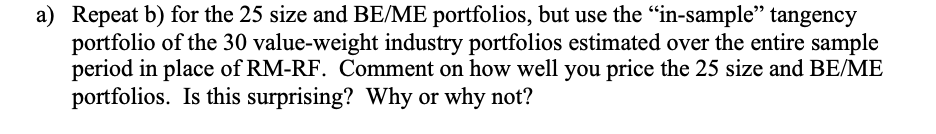

In [149]:
df30_1 = df30.iloc[: , :-2]
ef = EfficientFrontier(df30_1.mean(),df30_1.cov(), weight_bounds=(-100, 100))  # setup
ef.max_sharpe(risk_free_rate = df30['RF'].mean())

OrderedDict([('Food', 0.1002726235707405),
             ('Beer', 0.2385288811682622),
             ('Smoke', 0.362460477152046),
             ('Games', -0.0420143663665877),
             ('Books', -0.1072875737765772),
             ('Hshld', -0.1619013142855973),
             ('Clths', 0.1019828294183483),
             ('Hlth', 0.1694254487914342),
             ('Chems', 0.0940776212831879),
             ('Txtls', 0.1025793595019648),
             ('Cnstr', -0.3852436408819237),
             ('Steel', -0.2928270987642271),
             ('FabPr', -0.0804341821504269),
             ('ElcEq', 0.1326341504526456),
             ('Autos', 0.1120496617102697),
             ('Carry', 0.1740622688484026),
             ('Mines', 0.0900520055743288),
             ('Coal', 0.0256933564489593),
             ('Oil', 0.2772435293254994),
             ('Util', -0.0041802773617417),
             ('Telcm', 0.2147264070733554),
             ('Servs', 0.1134500701835153),
             ('BusEq', 0.21191412

In [151]:
data = [('Food', 0.1002726235707405),
             ('Beer', 0.2385288811682622),
             ('Smoke', 0.362460477152046),
             ('Games', -0.0420143663665877),
             ('Books', -0.1072875737765772),
             ('Hshld', -0.1619013142855973),
             ('Clths', 0.1019828294183483),
             ('Hlth', 0.1694254487914342),
             ('Chems', 0.0940776212831879),
             ('Txtls', 0.1025793595019648),
             ('Cnstr', -0.3852436408819237),
             ('Steel', -0.2928270987642271),
             ('FabPr', -0.0804341821504269),
             ('ElcEq', 0.1326341504526456),
             ('Autos', 0.1120496617102697),
             ('Carry', 0.1740622688484026),
             ('Mines', 0.0900520055743288),
             ('Coal', 0.0256933564489593),
             ('Oil', 0.2772435293254994),
             ('Util', -0.0041802773617417),
             ('Telcm', 0.2147264070733554),
             ('Servs', 0.1134500701835153),
             ('BusEq', 0.2119141255507682),
             ('Paper', 0.1512318872140537),
             ('Trans', -0.0747576090988673),
             ('Whlsl', -0.2121846832724279),
             ('Rtail', 0.095341694347205),
             ('Meals', 0.0835362040828966),
             ('Fin', -0.1628050901296282),
             ('Other', -0.3276267656098782)]
df_tangency_weights = pd.DataFrame(data)
df_tangency_weights = df_tangency_weights.transpose()
index = [0]
for i in range(30):
  index.append(df_tangency_weights[i][0])
index = index [1:]
df_tangency_weights.columns = index
df_tangency_weights.drop(0,axis=0,inplace=True)
df_tangency_weights.index = ['weights']
df_tangency_weights.transpose()

,weights
Food,0.100273
Beer,0.238529
Smoke,0.36246
Games,-0.042014
Books,-0.107288
Hshld,-0.161901
Clths,0.101983
Hlth,0.169425
Chems,0.094078
Txtls,0.102579


In [152]:
timeseries = df30.index
order = [0]
for i in range(1, df30.shape[0]):
  order.append(i)
df30.index = order

Tan_Ret = [0]
for i in range(0, df30.shape[0]):
  tan_ret = 0
  for j in df_tangency_weights.columns:
    tan_ret = tan_ret + df30[j][i] * df_tangency_weights[j]['weights']
  Tan_Ret.append(tan_ret)
Tan_Ret = Tan_Ret[1:]

df30['Tan_Ret']=Tan_Ret
df30['Tan-RF'] = df30['Tan_Ret'] - df30['RF'] 
df30.index = timeseries
df30

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Trans,Whlsl,Rtail,Meals,Fin,Other,RM-RF,RF,Tan_Ret,Tan-RF
192607,0.56,-5.19,1.29,2.93,10.97,-0.48,8.08,1.77,8.14,0.39,...,1.93,-23.79,0.07,1.87,0.37,5.20,2.96,0.22,6.260659,6.040659
192608,2.59,27.03,6.50,0.55,10.01,-3.58,-2.51,4.25,5.50,8.14,...,4.88,5.39,-0.75,-0.13,4.46,6.76,2.64,0.25,6.619387,6.369387
192609,1.16,4.02,1.26,6.58,-0.99,0.73,-0.51,0.69,5.33,2.31,...,0.05,-7.87,0.25,-0.56,-1.23,-3.86,0.36,0.23,5.324750,5.094750
192610,-3.06,-3.31,1.06,-4.76,9.47,-4.68,0.12,-0.57,-4.76,1.00,...,-2.64,-15.38,-2.20,-4.11,-5.16,-8.49,-3.24,0.32,3.745906,3.425906
192611,6.35,7.29,4.55,1.66,-5.80,-0.54,1.87,5.42,5.20,3.11,...,1.60,4.67,6.52,4.33,2.24,4.00,2.53,0.31,7.396117,7.086117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201607,-0.53,1.84,-2.76,6.08,5.68,2.60,1.64,6.03,4.31,8.41,...,5.41,3.67,3.80,2.20,3.91,-0.23,3.95,0.02,-1.030370,-1.050370
201608,-0.51,-0.88,-1.19,1.06,-0.54,1.38,1.39,-3.23,2.51,1.05,...,1.11,-1.02,-1.67,-0.22,4.65,2.24,0.50,0.02,-1.275699,-1.295699
201609,-2.91,1.65,-2.72,4.66,-2.60,0.23,-6.90,0.36,-1.74,-4.85,...,2.89,-2.54,-0.16,-2.26,-1.34,-3.52,0.25,0.02,1.736282,1.716282
201610,-0.22,-1.63,4.55,5.53,-10.29,-2.98,-5.74,-7.43,-1.93,-4.15,...,-0.62,-8.15,-3.57,-1.90,1.37,-0.50,-2.02,0.02,0.569575,0.549575


In [158]:
alpha_hat = [0]
for i in df25.iloc[:,:-2].columns:
  lm = pg.linear_regression(df25[i]-df25['RF'], df30['Tan-RF'])
  alpha_hat.append(lm.coef[0])
  #print(i)
  #print('\n')
  #print(lm)
  #print('\n')

alpha_hat = np.array(alpha_hat[1:])
alpha_hat = alpha_hat.reshape((25,1))

alpha_hat

array([[1.02141928],
       [0.99281543],
       [0.92471537],
       [0.88205343],
       [0.8763265 ],
       [0.95146423],
       [0.86892368],
       [0.84635938],
       [0.83010549],
       [0.85790106],
       [0.9090854 ],
       [0.79138765],
       [0.79541275],
       [0.79903101],
       [0.84792901],
       [0.81960596],
       [0.80302916],
       [0.79820185],
       [0.79572523],
       [0.87302564],
       [0.77188388],
       [0.77881653],
       [0.79172843],
       [0.88087388],
       [0.89234111]])

In [159]:
E_market_premium = df30['Tan-RF'].mean()
for t in df25.index:
  ebs_t = [0]
  for i in df25.iloc[:,:-2].columns:
    lm = pg.linear_regression(df25[i]-df25['RF'], df30['Tan-RF'])
    ebs = (df25[i][t]-df25['RF'][t]) - lm.coef[0] - lm.coef[1]*E_market_premium
    ebs_t.append(ebs)
  ebs_t = ebs_t[1:]
  ebs_t = np.array(ebs_t)
  ebs_t = ebs_t.reshape((25,1))
  ebs_t = (ebs_t).dot(ebs_t.T)
  if t == df25.index[0]:
    sigma_hat = ebs_t
  else:
    sigma_hat += ebs_t

sigma_hat = sigma_hat/len(df25.index)
sigma_hat

array([[150.68959411,  86.60796997,  86.71985285,  79.20002155,
         89.94702181,  76.29026824,  68.72861366,  68.25862392,
         70.21781669,  84.34517494,  70.15205671,  59.08377812,
         58.63302511,  62.37093387,  79.75579064,  54.48629492,
         52.17039701,  54.7291178 ,  61.73055198,  75.62329347,
         42.47014874,  42.1103076 ,  44.77043818,  53.67159564,
         72.10418613],
       [ 86.60796997,  97.60267947,  76.24756415,  74.27408592,
         79.62867873,  68.35561671,  65.38639189,  62.3812574 ,
         62.94568004,  71.44852388,  62.71236355,  52.18173809,
         52.20526385,  56.11500496,  65.95085385,  47.06120413,
         47.12976384,  49.55492054,  50.85472419,  65.15404918,
         36.50107499,  35.9799314 ,  37.80571364,  45.63561357,
         53.74525558],
       [ 86.71985285,  76.24756415,  81.41013727,  69.85786028,
         77.36353034,  61.22242867,  60.98223574,  59.69398942,
         61.33803342,  70.6404143 ,  58.25408914,  50.3695

In [160]:
'''b'''
GRS(alpha_hat, sigma_hat, len(df25.index), 25, 1)

[[1.15729507]]
p-value [[0.27011492]]


###j

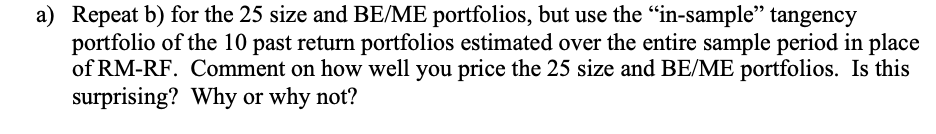

In [163]:
df10_1 = df10.iloc[: , :-2]
ef = EfficientFrontier(df10_1.mean(),df10_1.cov(), weight_bounds=(-100, 100))  # setup
ef.max_sharpe(risk_free_rate = df10['RF'].mean())

OrderedDict([(1, -1.0963299880676938),
             (2, 0.3533075417490929),
             (3, 0.0552391551687613),
             (4, 0.695951442537017),
             (5, 0.3521162210991635),
             (6, -0.4150859370488698),
             (7, -0.0018048935131347),
             (8, 0.2119871979633546),
             (9, -0.0419704982154894),
             (10, 0.8865897583277986)])

In [164]:
data = [(1, -1.0963299880676938),
             (2, 0.3533075417490929),
             (3, 0.0552391551687613),
             (4, 0.695951442537017),
             (5, 0.3521162210991635),
             (6, -0.4150859370488698),
             (7, -0.0018048935131347),
             (8, 0.2119871979633546),
             (9, -0.0419704982154894),
             (10, 0.8865897583277986)]
df_tangency_weights = pd.DataFrame(data)
df_tangency_weights = df_tangency_weights.transpose()
index = [0]
for i in range(10):
  index.append(df_tangency_weights[i][0])
index = index [1:]
df_tangency_weights.columns = index
df_tangency_weights.drop(0,axis=0,inplace=True)
df_tangency_weights.index = ['weights']
df_tangency_weights.transpose()

,weights
1.0,-1.096330
2.0,0.353308
3.0,0.055239
4.0,0.695951
5.0,0.352116
6.0,-0.415086
7.0,-0.001805
8.0,0.211987
9.0,-0.041970
10.0,0.886590


In [165]:
timeseries = df10.index
order = [0]
for i in range(1, df10.shape[0]):
  order.append(i)
df10.index = order

Tan_Ret = [0]
for i in range(0, df10.shape[0]):
  tan_ret = 0
  for j in df_tangency_weights.columns:
    tan_ret = tan_ret + df10[j][i] * df_tangency_weights[j]['weights']
  Tan_Ret.append(tan_ret)
Tan_Ret = Tan_Ret[1:]

df10['Tan_Ret']=Tan_Ret
df10['Tan-RF'] = df10['Tan_Ret'] - df10['RF'] 
df10.index = timeseries
df10

,1,2,3,4,5,6,7,8,9,10,RM-RF,RF,Tan_Ret,Tan-RF
Date,,,,,,,,,,,,,,
192701,-3.32,-4.62,2.66,-0.32,-0.41,0.96,0.77,0.36,-0.43,-0.24,-0.06,0.25,1.269108,1.019108
192702,7.49,6.01,8.33,7.51,3.80,4.16,2.81,3.28,4.21,6.96,4.18,0.26,5.894104,5.634104
192703,-3.20,-2.99,-3.98,-4.76,-0.48,-2.40,2.10,0.61,0.89,5.47,0.13,0.30,4.684290,4.384290
192704,1.53,-2.87,-2.46,-1.34,2.59,-0.13,2.05,-0.59,1.64,5.49,0.46,0.25,1.875875,1.625875
192705,3.98,4.39,5.90,3.15,6.25,5.92,4.66,6.59,8.16,6.24,5.44,0.30,6.027628,5.727628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201607,7.41,8.63,6.14,6.72,4.34,4.46,2.61,2.29,3.04,4.15,3.95,0.02,3.650599,3.630599
201608,4.87,1.71,2.38,1.45,1.28,1.76,0.00,-0.37,-1.75,-0.96,0.50,0.02,-4.730328,-4.750328
201609,4.61,2.04,-0.89,-0.35,-0.25,-0.25,0.41,0.39,-0.71,3.04,0.25,0.02,-1.803370,-1.823370


In [175]:
df25_match_10_index = df25.loc[192701:]
alpha_hat = [0]
for i in df25.iloc[:,:-2].columns:
  lm = pg.linear_regression(df25_match_10_index[i]-df25_match_10_index['RF'], df10['Tan-RF'])
  alpha_hat.append(lm.coef[0])
  #print(i)
  #print('\n')
  #print(lm)
  #print('\n')

alpha_hat = np.array(alpha_hat[1:])
alpha_hat = alpha_hat.reshape((25,1))

alpha_hat

array([[1.64415712],
       [1.58866702],
       [1.53556933],
       [1.45824241],
       [1.49373381],
       [1.52583823],
       [1.43176407],
       [1.40164275],
       [1.40024729],
       [1.44117328],
       [1.47480727],
       [1.31477456],
       [1.34177889],
       [1.37205349],
       [1.44291882],
       [1.35628986],
       [1.3604369 ],
       [1.35577119],
       [1.37277951],
       [1.46750649],
       [1.33876319],
       [1.34737027],
       [1.37523934],
       [1.48726152],
       [1.50239979]])

In [176]:
E_market_premium = df10['Tan-RF'].mean()
for t in df25_match_10_index.index:
  ebs_t = [0]
  for i in df25_match_10_index.iloc[:,:-2].columns:
    lm = pg.linear_regression(df25_match_10_index[i]-df25_match_10_index['RF'], df10['Tan-RF'])
    ebs = (df25_match_10_index[i][t]-df25_match_10_index['RF'][t]) - lm.coef[0] - lm.coef[1]*E_market_premium
    ebs_t.append(ebs)
  ebs_t = ebs_t[1:]
  ebs_t = np.array(ebs_t)
  ebs_t = ebs_t.reshape((25,1))
  ebs_t = (ebs_t).dot(ebs_t.T)
  if t == df25_match_10_index.index[0]:
    sigma_hat = ebs_t
  else:
    sigma_hat += ebs_t

sigma_hat = sigma_hat/len(df25_match_10_index.index)
sigma_hat

array([[152.51803609,  88.28986615,  88.11068772,  80.53080412,
         91.14326331,  78.12459157,  70.19178041,  69.72672898,
         71.49710263,  85.57707828,  71.92856753,  60.69986202,
         60.22618664,  63.82361949,  81.06752495,  56.33969085,
         53.94532435,  56.33433685,  63.20885332,  77.03718816,
         44.48806763,  44.1195724 ,  46.56382553,  55.35281076,
         73.50303039],
       [ 88.28986615,  99.18943648,  77.55644783,  75.53537146,
         80.74042747,  70.14912691,  66.84143293,  63.77427429,
         64.16240387,  72.62316169,  64.36733052,  53.71718627,
         53.66946442,  57.49744619,  67.17790283,  48.84436527,
         48.86048172,  51.08752604,  52.22755707,  66.47641391,
         38.44228187,  37.94905936,  39.52647091,  47.34640556,
         55.07203671],
       [ 88.11068772,  77.55644783,  82.42238634,  70.79601058,
         78.12465317,  62.63803405,  62.10146257,  60.74149988,
         62.2361434 ,  71.47223683,  59.58232814,  51.5516

In [178]:
'''b'''
GRS(alpha_hat, sigma_hat, len(df25_match_10_index.index), 25, 1)

[[3.05935174]]
p-value [[7.7171645e-07]]


###k(correlation matrix)

In [182]:
df30 = df30.iloc[:,:-4]
df30.corr()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,1.000000,0.699840,0.668360,0.708903,0.730341,0.798788,0.647365,0.778632,0.737730,0.682854,...,0.650761,0.415648,0.633262,0.760007,0.708032,0.690422,0.804252,0.731661,0.803779,0.721825
Beer,0.699840,1.000000,0.455077,0.648398,0.598021,0.657155,0.513766,0.640036,0.614852,0.614180,...,0.506854,0.343409,0.534445,0.617168,0.609462,0.664233,0.651469,0.633582,0.671438,0.626033
Smoke,0.668360,0.455077,1.000000,0.497541,0.483755,0.550631,0.442780,0.566751,0.507633,0.455270,...,0.459706,0.295363,0.440057,0.537193,0.483322,0.485983,0.533577,0.494500,0.552058,0.531569
Games,0.708903,0.648398,0.497541,1.000000,0.736296,0.713665,0.625617,0.677538,0.724404,0.747342,...,0.629113,0.434466,0.723628,0.710215,0.749653,0.754833,0.758121,0.746756,0.802073,0.766032
Books,0.730341,0.598021,0.483755,0.736296,1.000000,0.713886,0.685416,0.661243,0.710878,0.762207,...,0.624699,0.485867,0.660451,0.750127,0.764624,0.722458,0.765286,0.709977,0.783199,0.731801
Hshld,0.798788,0.657155,0.550631,0.713665,0.713886,1.000000,0.600315,0.746857,0.734856,0.671487,...,0.598293,0.411470,0.681388,0.766799,0.684947,0.686435,0.771661,0.691684,0.766908,0.740578
Clths,0.647365,0.513766,0.442780,0.625617,0.685416,0.600315,1.000000,0.549505,0.656809,0.737312,...,0.532185,0.442394,0.607962,0.686461,0.660706,0.651559,0.742168,0.682054,0.661841,0.662909
Hlth,0.778632,0.640036,0.566751,0.677538,0.661243,0.746857,0.549505,1.000000,0.696119,0.604270,...,0.606166,0.417968,0.681709,0.716983,0.649379,0.662979,0.721967,0.668247,0.750908,0.683581
Chems,0.737730,0.614852,0.507633,0.724404,0.710878,0.734856,0.656809,0.696119,1.000000,0.740960,...,0.660447,0.407818,0.732288,0.857568,0.767958,0.681985,0.752531,0.673831,0.797524,0.756425
Txtls,0.682854,0.614180,0.455270,0.747342,0.762207,0.671487,0.737312,0.604270,0.740960,1.000000,...,0.582664,0.395150,0.640137,0.744092,0.761700,0.719743,0.756982,0.688466,0.758149,0.735972


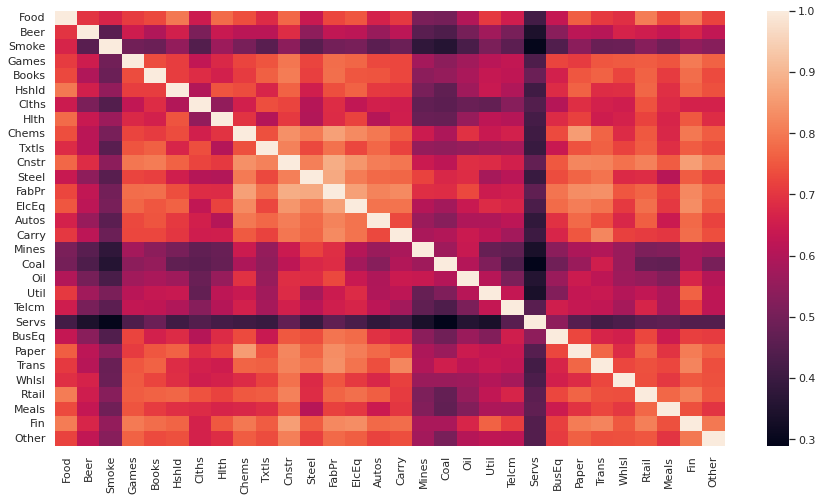

In [184]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df30.corr()
sn.heatmap(corrMatrix, annot=False)
sns.set(rc = {'figure.figsize':(15,8)})
plt.show()

In [186]:
df10 = df10.iloc[:,:-4]
df10.corr()

,1,2,3,4,5,6,7,8,9,10
1,1.000000,0.932180,0.903878,0.880937,0.864272,0.828880,0.773502,0.727230,0.686707,0.602835
2,0.932180,1.000000,0.941404,0.923104,0.906630,0.879526,0.818605,0.768079,0.715767,0.610570
3,0.903878,0.941404,1.000000,0.943798,0.931830,0.905520,0.849225,0.802917,0.749006,0.629024
4,0.880937,0.923104,0.943798,1.000000,0.939616,0.923898,0.881859,0.841740,0.789639,0.666744
5,0.864272,0.906630,0.931830,0.939616,1.000000,0.937288,0.903064,0.864873,0.819038,0.702012
6,0.828880,0.879526,0.905520,0.923898,0.937288,1.000000,0.934951,0.904270,0.872743,0.756760
7,0.773502,0.818605,0.849225,0.881859,0.903064,0.934951,1.000000,0.927633,0.900873,0.788895
8,0.727230,0.768079,0.802917,0.841740,0.864873,0.904270,0.927633,1.000000,0.932178,0.847110
9,0.686707,0.715767,0.749006,0.789639,0.819038,0.872743,0.900873,0.932178,1.000000,0.888024
10,0.602835,0.610570,0.629024,0.666744,0.702012,0.756760,0.788895,0.847110,0.888024,1.000000


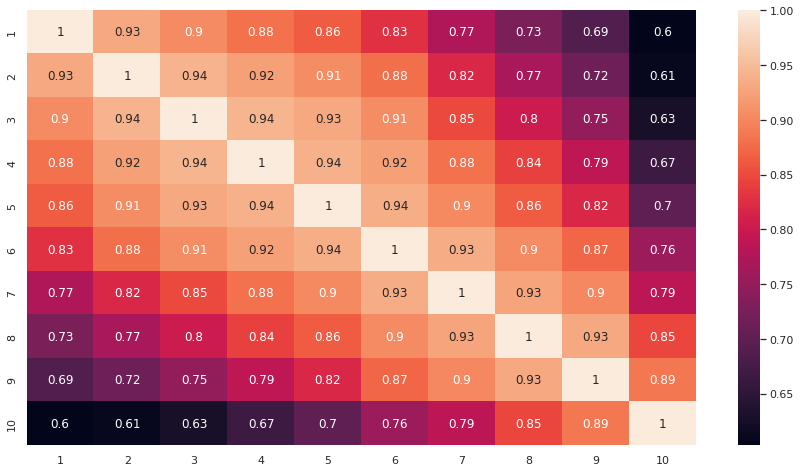

In [ ]:
corrMatrix = df10.corr()
sn.heatmap(corrMatrix, annot=True)
sns.set(rc = {'figure.figsize':(5,2)})
plt.show()

In [ ]:
df25 = df25.iloc[:,:-2]
df25.corr()

,1.1,1.2,1.3,1.4,1.5,2.1,2.2,2.3,2.4,2.5,...,4.1,4.2,4.3,4.4,4.5,5.1,5.2,5.3,5.4,5.5
1.1,1.000000,0.712898,0.782800,0.772440,0.788634,0.772960,0.743804,0.763671,0.768837,0.789333,...,0.703583,0.693820,0.690829,0.736474,0.704919,0.639059,0.638517,0.639986,0.655461,0.684195
1.2,0.712898,1.000000,0.855533,0.900450,0.867486,0.861469,0.880214,0.867918,0.856912,0.830935,...,0.756183,0.780201,0.778364,0.754367,0.755027,0.684046,0.679445,0.672692,0.693575,0.633745
1.3,0.782800,0.855533,1.000000,0.925831,0.920691,0.845990,0.898671,0.908894,0.913334,0.897803,...,0.772274,0.836707,0.844126,0.833129,0.833906,0.722327,0.739334,0.735907,0.772826,0.758119
1.4,0.772440,0.900450,0.925831,1.000000,0.950461,0.867520,0.914633,0.930419,0.934698,0.915181,...,0.768533,0.832338,0.843386,0.848175,0.846792,0.711295,0.735170,0.742933,0.779784,0.740882
1.5,0.788634,0.867486,0.920691,0.950461,1.000000,0.832105,0.892716,0.905222,0.924663,0.937677,...,0.732468,0.814405,0.839414,0.853545,0.862667,0.680791,0.718296,0.739565,0.788300,0.767011
2.1,0.772960,0.861469,0.845990,0.867520,0.832105,1.000000,0.920502,0.892663,0.868977,0.826499,...,0.885190,0.851915,0.817011,0.798089,0.771541,0.784331,0.764854,0.711913,0.720404,0.674587
2.2,0.743804,0.880214,0.898671,0.914633,0.892716,0.920502,1.000000,0.943699,0.927486,0.888668,...,0.865981,0.901532,0.887004,0.859735,0.846544,0.792837,0.801264,0.778701,0.796785,0.723023
2.3,0.763671,0.867918,0.908894,0.930419,0.905222,0.892663,0.943699,1.000000,0.955678,0.916346,...,0.842382,0.906066,0.910282,0.892853,0.885138,0.790444,0.818420,0.810981,0.837846,0.769174
2.4,0.768837,0.856912,0.913334,0.934698,0.924663,0.868977,0.927486,0.955678,1.000000,0.936508,...,0.816325,0.899773,0.909003,0.913684,0.905103,0.767397,0.809901,0.828953,0.860121,0.801366
2.5,0.789333,0.830935,0.897803,0.915181,0.937677,0.826499,0.888668,0.916346,0.936508,1.000000,...,0.783452,0.863034,0.889452,0.902401,0.906192,0.732986,0.783546,0.803435,0.846862,0.827533


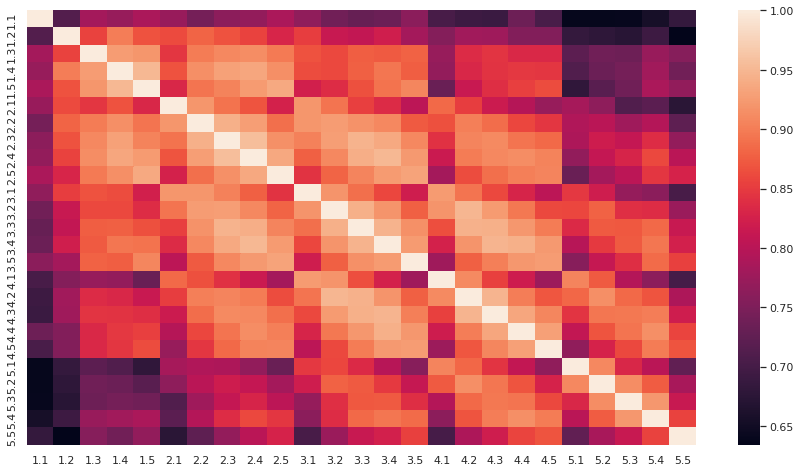

In [ ]:
corrMatrix = df25.corr()
sn.heatmap(corrMatrix, annot=False)
sns.set(rc = {'figure.figsize':(15,8)})
plt.show()